# Alper Tanrıkulu BSB616 Advanced Statistics Term Project 
## 225023062003

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import seaborn as sns
import math
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Data Preprocessing

The data we will use contains information about the physical characteristics of fish found in "Kaunas Water Reservoir" and "Curonian Lagoon" lakes. There are also columns containing a lot of information that we will not use in our statistical analysis. For ease of use, the unused columns are removed from the DataFrame.

In [2]:
df = pd.read_csv("HistoricalFishSurveyDataset_Lithuania.csv")
df.head()

,Water body,Location,Latitude,Longitude,Date,Species_la,Species_en,method,total_length,standard_length,...,gear_type,total_gear_length,total_gear_length_broad,mesh_size,mesh_size_min,mesh_size_max,mesh_size_broad,soak_time,soak_time_broad,depth
0,Kaunas Water Reservoir,Lower,54.858628,24.123667,1973-07-13,Rutilus rutilus,Roach,2,17.0,NaN,...,Gillnet,NaN,very long,NaN,32.0,36.0,full,12.0,long,NaN
1,Kaunas Water Reservoir,Lower,54.858628,24.123667,1973-07-13,Rutilus rutilus,Roach,2,19.0,NaN,...,Gillnet,NaN,very long,NaN,32.0,36.0,full,12.0,long,NaN
2,Kaunas Water Reservoir,Lower,54.858628,24.123667,1973-07-13,Rutilus rutilus,Roach,2,20.0,NaN,...,Gillnet,NaN,very long,NaN,32.0,36.0,full,12.0,long,NaN
3,Kaunas Water Reservoir,Lower,54.858628,24.123667,1973-07-13,Rutilus rutilus,Roach,2,21.0,NaN,...,Gillnet,NaN,very long,NaN,32.0,36.0,full,12.0,long,NaN
4,Kaunas Water Reservoir,Lower,54.858628,24.123667,1973-07-13,Rutilus rutilus,Roach,2,22.0,NaN,...,Gillnet,NaN,very long,NaN,32.0,36.0,full,12.0,long,NaN


In [35]:
cleaned_df = df[['Water body', 'Location', 'Species_la', 'total_length', 'fish_weight', 'sex', 'gear_type']]
display(cleaned_df)

,Water body,Location,Species_la,total_length,fish_weight,sex,gear_type
0,Kaunas Water Reservoir,Lower,Rutilus rutilus,17.0,NaN,NaN,Gillnet
1,Kaunas Water Reservoir,Lower,Rutilus rutilus,19.0,NaN,NaN,Gillnet
2,Kaunas Water Reservoir,Lower,Rutilus rutilus,20.0,NaN,NaN,Gillnet
3,Kaunas Water Reservoir,Lower,Rutilus rutilus,21.0,NaN,NaN,Gillnet
4,Kaunas Water Reservoir,Lower,Rutilus rutilus,22.0,NaN,NaN,Gillnet
...,...,...,...,...,...,...,...
61666,Curonian Lagoon,Vente,Salmo trutta trutta,69.0,3500.0,1.0,Gillnet
61667,Curonian Lagoon,Vente,Salmo trutta trutta,59.0,2210.0,2.0,Gillnet
61668,Curonian Lagoon,Dreverna,Rutilus rutilus,29.0,300.0,NaN,Gillnet
61669,Curonian Lagoon,Dreverna,Lota lota,46.0,870.0,1.0,Gillnet


## Pearson’s chi-squared Two-Sample Test for Binomial Proportions (unmatched)

Our dataset contains fish samples collected from two different lakes. We want to compare the fishing rates of fish caught with a "Trawl" in these lakes. First, we remove columns with NaN values from the columns we will use. Then, we check whether fishing with a trawl is done in both lakes.

In [4]:
cleaned_NaN = cleaned_df.dropna(subset=['Water body', 'Species_la', 'gear_type'])

In [5]:
cleaned_NaN.loc[(cleaned_NaN["Water body"] == "Curonian Lagoon") & (cleaned_NaN["Species_la"] != "Perca fluviatilis")]['gear_type'].unique()

array(['Gillnet', 'Trawl', 'Fykenet', 'Beach seine',
       'Gillnet and fykenet', 'Trawl and fykenet'], dtype=object)

In [6]:
cleaned_NaN.loc[(cleaned_NaN["Water body"] == "Kaunas Water Reservoir") & (cleaned_NaN["Species_la"] != "Perca fluviatilis")]['gear_type'].unique()


array(['Gillnet', 'Trawl', 'Beach seine', 'Rod'], dtype=object)

It appears that trawl fishing is conducted in both lakes. We create a $2x2$ summary table with the numbers of fish caught by trawl and other methods.

$H_0: p_1 = p_2$ $H_1: p_1 ≠ p_2$

In [7]:
Kaunas_trawl = len(cleaned_NaN.loc[(cleaned_NaN["Water body"] == "Kaunas Water Reservoir") & 
                   (cleaned_NaN["gear_type"] == "Trawl")])
Kaunas_other = len(cleaned_NaN.loc[(cleaned_NaN["Water body"] == "Kaunas Water Reservoir") & 
                   (cleaned_NaN["gear_type"] != "Trawl")])

Curonial_trawl = len(cleaned_NaN.loc[(cleaned_NaN["Water body"] == "Curonian Lagoon") & 
                   (cleaned_NaN["gear_type"] == "Trawl")])
Curonial_other = len(cleaned_NaN.loc[(cleaned_NaN["Water body"] == "Curonian Lagoon") & 
                   (cleaned_NaN["gear_type"] != "Trawl")])

data = [[Kaunas_trawl, Curonial_trawl, Kaunas_trawl+Curonial_trawl], 
        [Kaunas_other, Curonial_other, Kaunas_other+Curonial_other],
        [Kaunas_trawl+Kaunas_other, Curonial_trawl+Curonial_other,Kaunas_trawl+Kaunas_other+Curonial_trawl+Curonial_other]]
contingency_table = pd.DataFrame(data, columns=['Kaunas', 'Curonian', 'Total'], index=['Trawl', 'Others', 'Total'])
display(contingency_table)

,Kaunas,Curonian,Total
Trawl,467,8798,9265
Others,31848,14721,46569
Total,32315,23519,55834


In [8]:
from scipy.stats import chi2_contingency

matrix = np.array([[Kaunas_trawl, Curonial_trawl], [Kaunas_other, Curonial_other]])

chi2, p, dof, expected = chi2_contingency(matrix, correction=False)

# Print the results
print("Chi2 Statistic:\t\t", chi2)
print("P-value:\t\t", p)
print("Degrees of Freedom:\t", dof)
print("Expected Frequencies:\n", expected)

Chi2 Statistic:		 12720.05297900437
P-value:		 0.0
Degrees of Freedom:	 1
Expected Frequencies:
 [[ 5362.29671885  3902.70328115]
 [26952.70328115 19616.29671885]]


The Expected Table contains all cells with numbers greater than 5. Therefore, the assumption of a normal distribution can be made, and there is no need to apply Yates' Correction. According to the results of the chi-square test, a statistically significant difference was found in the fishing rates with "trawl" between fish in two different lakes. When examining the expected frequencies matrix, it is observed that the fishing rates with "trawl" vary significantly between the different lakes. Based on this result, it can be interpreted that there are more fish species suitable for trawl fishing in Curonian Lagoon or that the structure of Kaunas Water Reservoir is not suitable for trawl fishing.

<hr>

## Simple Linear Regression Analysis

Regression analysis is a data science approach used to understand the relationship between continuous dependent and independent variables. Dependent variables are those whose values are determined based on one or more independent variables. To build a regression model, both dependent and independent variables are required. By determining the relationship between the dependent and independent variables, a regression model can be created to predict the value of the dependent variable. Various regression models can be applied depending on the structure of the data and the information desired to be extracted from the data.

Here, we are creating a Linear Regression model **to predict the weights of Abramis brama fish** found in the Curonian Lagoon. For this, we need to first obtain the desired sample from our dataset and remove NaN values and outlier values.

In [9]:
cleaned_NaN_reg = cleaned_df.dropna(subset=['Water body', 'Species_la', 'fish_weight', 'total_length'])
cleaned_NaN_reg = cleaned_NaN_reg[['Water body', 'Species_la', 'total_length', 'fish_weight']]
cleaned_NaN_reg = cleaned_NaN_reg.loc[(cleaned_NaN_reg["Water body"] == "Curonian Lagoon") & (cleaned_NaN_reg["Species_la"] == "Abramis brama")]
cleaned_NaN_reg.head()

,Water body,Species_la,total_length,fish_weight
32315,Curonian Lagoon,Abramis brama,34.0,420.0
32316,Curonian Lagoon,Abramis brama,35.0,440.0
32317,Curonian Lagoon,Abramis brama,39.0,718.0
32318,Curonian Lagoon,Abramis brama,40.0,758.0
32319,Curonian Lagoon,Abramis brama,42.0,860.0


In [10]:
if_nan = cleaned_NaN_reg.isnull().values.any()
nan_result = " some" if if_nan else " no"
print(f"There are {len(cleaned_NaN_reg)} rows and{nan_result} NaN values")

There are 10308 rows and no NaN values


The relationship between "weight" and "total length" features can be checked by eyes. So, it is visualized below.

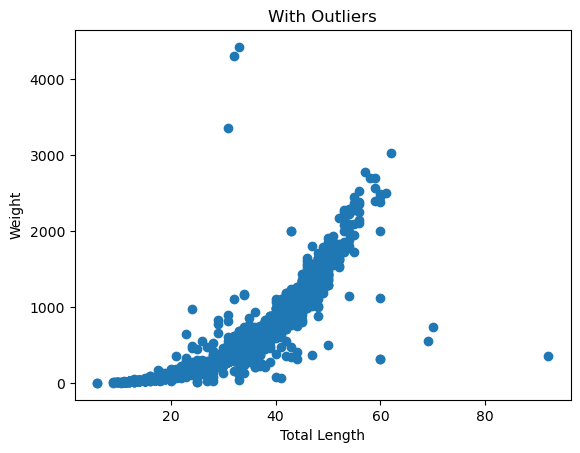

In [11]:
look = cleaned_NaN_reg[["total_length", "fish_weight"]]

plt.figure()
plt.scatter(cleaned_NaN_reg[['total_length']], cleaned_NaN_reg[['fish_weight']])
plt.title("With Outliers")
plt.xlabel('Total Length')
plt.ylabel('Weight')
plt.show()

In [12]:
cleaned_NaN_reg.describe().T

,count,mean,std,min,25%,50%,75%,max
total_length,10308.0,33.48766,7.999588,6.0,28.0,34.0,39.0,92.0
fish_weight,10308.0,519.52339,351.089128,1.0,255.0,460.0,728.0,4420.0


There looks some outliers. They may effect our model. We will clean the outliers using IQR. It looks there is also an exponentially postive relationship between features but we are gonna fit a linear model here. 

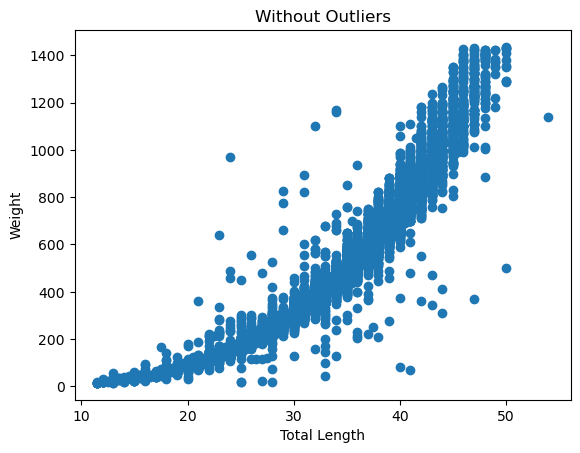

In [13]:
# IQR calculation for weight
q1_weight = cleaned_NaN_reg.fish_weight.quantile(0.25)
q3_weight = cleaned_NaN_reg.fish_weight.quantile(0.75)
iqr_weight = q3_weight - q1_weight
alt_weight = q1_weight - 1.5*iqr_weight
ust_weight = q3_weight + 1.5*iqr_weight

# IQR calculation for height
q1_height = cleaned_NaN_reg.total_length.quantile(0.25)
q3_height = cleaned_NaN_reg.total_length.quantile(0.75)
iqr_height = q3_height - q1_height
alt_height = q1_height - 1.5*iqr_height
ust_height = q3_height + 1.5*iqr_height

cleaned_NaN_reg_NO = cleaned_NaN_reg[["total_length", "fish_weight"]]
cleaned_NaN_reg_NO = cleaned_NaN_reg_NO.drop(cleaned_NaN_reg_NO[(cleaned_NaN_reg_NO["fish_weight"] > ust_weight) | (cleaned_NaN_reg_NO["fish_weight"] < alt_weight)].index) # outlier valued rows for weight deleted 
cleaned_NaN_reg_NO = cleaned_NaN_reg_NO.drop(cleaned_NaN_reg_NO[(cleaned_NaN_reg_NO["total_length"] > ust_height) | (cleaned_NaN_reg_NO["total_length"] < alt_height)].index) # outlier valued rows for height deleted 


weight = cleaned_NaN_reg_NO[["fish_weight"]]
length = cleaned_NaN_reg_NO[["total_length"]]

plt.figure()
plt.scatter(cleaned_NaN_reg_NO[['total_length']], cleaned_NaN_reg_NO[['fish_weight']])
plt.title("Without Outliers")
plt.xlabel('Total Length')
plt.ylabel('Weight')
plt.show()

In [14]:
cleaned_NaN_reg.describe().T

,count,mean,std,min,25%,50%,75%,max
total_length,10308.0,33.48766,7.999588,6.0,28.0,34.0,39.0,92.0
fish_weight,10308.0,519.52339,351.089128,1.0,255.0,460.0,728.0,4420.0


The dataset, which has been cleaned of outlier data, appears to be more suitable for constructing the regression model. The regression model built with this dataset is expected to provide weight estimates that are closer to the population mean rather than the sample mean.

### The Correlation Coefficient

A correlation matrix is being created to observe quantitatively the relationship between the total lengths and weights of the fish.

In [15]:
correlation_matrix = cleaned_NaN_reg_NO.corr()
display(correlation_matrix.style.background_gradient(axis = 0 ,cmap = "Blues" ))

,total_length,fish_weight
total_length,1.000000,0.942548
fish_weight,0.942548,1.000000


The relationship between the total lengths of fish and their weights is visualized in the graph. It is observed that as the total length increases, the weight also increases. Moreover, as seen in the correlation matrix, the correlation between weight and length variables is very close to 1. Considering this situation, it can be concluded that weight and length variables are suitable for creating a linear regression model.

### Creating a model and printing the linear regression line on the chart:

<Figure size 640x480 with 0 Axes>

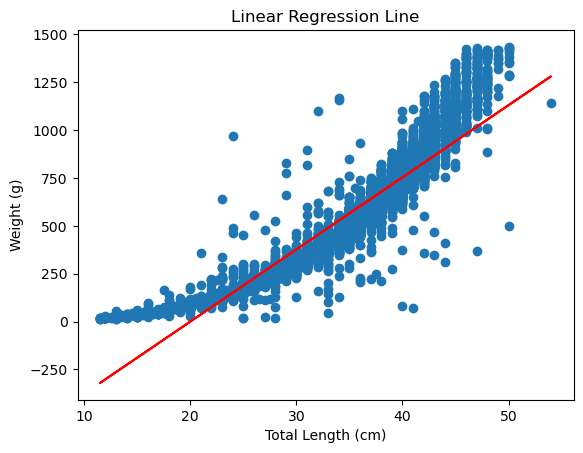

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula="fish_weight ~ total_length"
linear_2f_model = ols(formula, data=cleaned_NaN_reg_NO).fit()
aov_table = sm.stats.anova_lm(linear_2f_model, typ=2)
aov_table


plt.figure()

# plot original values
plt.figure()
plt.scatter(cleaned_NaN_reg_NO[['total_length']], cleaned_NaN_reg_NO[['fish_weight']])
plt.plot(cleaned_NaN_reg_NO["total_length"], linear_2f_model.predict(length), c='red', label='prediction')

plt.title("Linear Regression Line")
plt.xlabel('Total Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

In [17]:
# to take coefficient and the formula
coefficients = linear_2f_model.params
formula = linear_2f_model.model.formula

equation = f"y ≈ {coefficients['Intercept']} + {coefficients['total_length']}*Length"

print("The approximate equation of the fitted regression line:")
print(equation)
print("R-squared:", linear_2f_model.rsquared)

The approximate equation of the fitted regression line:
y ≈ -754.4784187542765 + 37.7022671460752*Length
R-squared: 0.8883957914406528


### How well does the regression line fit?

**F-Test** can be used to understand whether the coefficient of the linear regression is different from 0. 

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula="fish_weight ~ total_length"
linear_2f_model = ols(formula, data=cleaned_NaN_reg_NO).fit()
aov_table = sm.stats.anova_lm(linear_2f_model, typ=2)
aov_table

#print(linear_2f_model.summary())

,sum_sq,df,F,PR(>F)
total_length,8.281747e+08,1.0,80414.299792,0.0
Residual,1.040390e+08,10102.0,NaN,NaN


The F value for the total length variable was found to be significantly large. Consequently, the p-value is very close to 0. This implies that the coefficient of our model is significantly different from 0, leading to the rejection of the null hypothesis $H_0: B = 0$.


#### Model Can Be Tested Below

In [19]:
new_data = pd.DataFrame({'total_length': [35]})

# prediction
prediction = linear_2f_model.predict(new_data)

print(f"Predicted weight for length 35: {prediction.iloc[0]}")

Predicted weight for length 35: 565.1009313583555


<hr>

## One-Way ANOVA-Fixed-Effects Model

The hypotheses for investigating whether the average weights of fish living in the Curonian Lagoon regions 'Vente', 'Sarkuva', 'Rasyte', and 'Atmata' are different from each other are formulated as follows:

$H_0:a_i = 0$ --> (All the group averages are same)<br>
$H_1:a_i ≠ 0$ --> (at least one average is different from others)

For this purpose, we are removing rows with NaN values in the 'Water body', 'Location', and 'fish_weight' columns for different locations and keeping only the records that contain 'Vente', 'Sarkuva', 'Rasyte', and 'Atmata' data in the Location column.

In [20]:
cleaned_NaN_anov = cleaned_df.dropna(subset=['Water body', 'Location', 'fish_weight'])
cleaned_NaN_anov.loc[(cleaned_NaN_anov["Water body"] == "Curonian Lagoon")]['Location'].unique()

array(['Grobsto ragas', 'Vente', 'Sarkuva', 'Rasyte', 'Atmata',
       'Juodkrante - Nida', 'Pakalne', 'Skirvyte', 'Preila', 'Ezia',
       'Inze', 'Nemunyne', 'Gilija', 'Labagainiai', 'Pilkopa', 'Nida',
       'Pervalka', 'Sakute', 'Karkles il.', 'Rusne', 'Kiaules nugara',
       'Juodkrante', 'Bambelis', 'Naglis', 'Svencele', 'Kintai',
       'Vidmares', 'Bulvikio ragas', 'Deimena', 'Dreverna',
       'Gilija-Rasyte', 'Juodoji buja', 'Kliosiu miskas', 'Alksnyne'],
      dtype=object)

In [21]:
cleaned_NaN_anov =  cleaned_NaN_anov.loc[(cleaned_NaN_anov["Water body"] == "Curonian Lagoon") & 
((cleaned_NaN_anov["Location"] == "Vente") | 
 (cleaned_NaN_anov["Location"] == "Sarkuva") |
 (cleaned_NaN_anov["Location"] == "Rasyte") |
 (cleaned_NaN_anov["Location"] == "Atmata"))]
cleaned_NaN_anov.head() # Data frame with 'Water body', 'Location', and 'Fish Weight' columns cleared of NaN values

,Water body,Location,Species_la,total_length,fish_weight,sex,gear_type
32329,Curonian Lagoon,Vente,Rutilus rutilus,28.0,335.0,2.0,Gillnet
32330,Curonian Lagoon,Vente,Rutilus rutilus,34.0,545.0,2.0,Gillnet
32331,Curonian Lagoon,Vente,Rutilus rutilus,30.0,390.0,NaN,Gillnet
32332,Curonian Lagoon,Vente,Abramis brama,34.0,425.0,2.0,Gillnet
32333,Curonian Lagoon,Vente,Sander lucioperca,42.0,735.0,1.0,Gillnet


In [22]:
model = ols('fish_weight ~ C(Location)', data=cleaned_NaN_anov).fit()

# print ANOVA table
anova_table = sm.stats.anova_lm(model, typ=1)
print(anova_table)

                  df        sum_sq       mean_sq          F        PR(>F)
C(Location)      3.0  6.419393e+06  2.139798e+06  12.224475  5.564942e-08
Residual     10235.0  1.791556e+09  1.750421e+05        NaN           NaN


The p-value was found to be very small. As a result, the null hypothesis ($H_0$) is rejected. This suggests that there is a high probability that the average weight of fish living in different regions is different for at least one of them.

Now we are going to find the groups which have different averages from others.

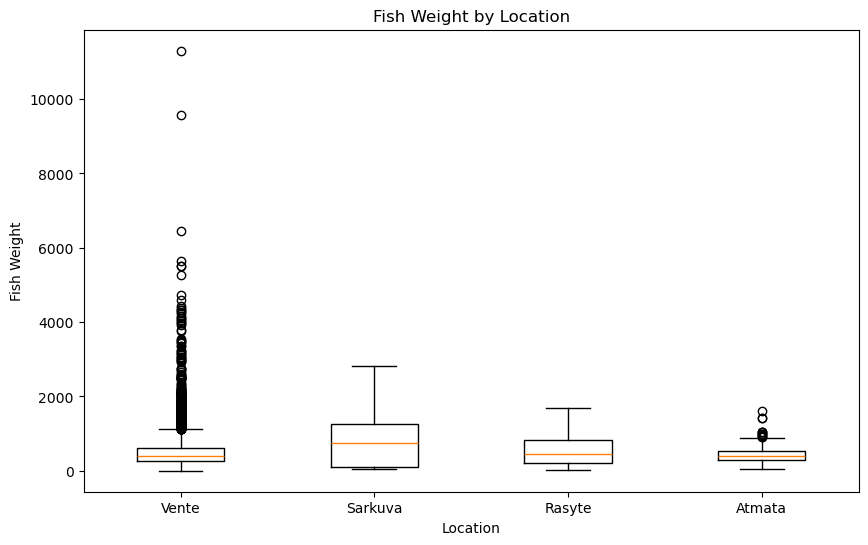

In [23]:
data = cleaned_NaN_anov[['Location', 'fish_weight']]
Vente = data.loc[(data['Location']  == 'Vente')]['fish_weight'].values
Sarkuva = data.loc[(data['Location']  == 'Sarkuva')]['fish_weight'].values
Rasyte = data.loc[(data['Location']  == 'Rasyte')]['fish_weight'].values
Atmata = data.loc[(data['Location']  == 'Atmata')]['fish_weight'].values
data_dict = {'Vente': Vente, 'Sarkuva': Sarkuva, 'Rasyte': Rasyte, 'Atmata': Atmata}

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_dict.values(), labels=data_dict.keys())
plt.title('Fish Weight by Location')
plt.xlabel('Location')
plt.ylabel('Fish Weight')
plt.show()

The weights of fish in the Sarkuva region may appear to be larger than in other regions based on the graph and can be evaluated. However, for the consistency of this evaluation, further testing methods are needed.

<hr>

## t Test for the Comparison of Pairs of Groups in One-Way ANOVA (LSD Procedure)

I couldn't find a function similar to the example in the book that calculates means, standard deviations, and sample sizes for groups. Therefore, we are defining our own function to perform this test. We can use the LSD procedure to compare fish weights of different locations in pairwise groups.

In [24]:
from math import sqrt
import scipy.stats as stats
import pandas as pd


def lsd_method(df):
    k = len(df)
    n_total = df.iloc[:, 3].sum()
    sum_sq = 0
    
    # Calculating the total sample size and the sum of squares total and Within MS for pooled s²
    for index in range(k):
        ni = df.iloc[index, 3]
        si = df.iloc[index, 2]
        sum_sq += (ni-1) * (si**2)
    
    df_residual = n_total - k
    pooled_var = sum_sq/df_residual
    liste = []
    # Comparisons between groups and calculation of p-values
    for i in range(k-1):
        for j in range(i+1, k):
            group1 = str(df.iloc[i, 0])
            group2 = str(df.iloc[j, 0])
            n1 = df.iloc[i, 3]
            n2 = df.iloc[j, 3]
            s1 = df.iloc[i, 2]
            s2 = df.iloc[j, 2]
            m1 = df.iloc[i, 1]
            m2 = df.iloc[j, 1]
            
           
            t_value = (m1 - m2) / sqrt(pooled_var * ((1/n1) + (1/n2)))
            p_value = stats.t.sf(abs(t_value), df_residual) * 2
                
            p_value_c = k*(k-1)*p_value
            if (p_value_c > 1):
                p_value_c = 1

            groups = f"{group1}-{group2}"
            liste.append([groups, p_value, p_value_c])
    
    p_table = pd.DataFrame(liste, columns=['Comparison', 'p-value', 'Bonferroni corrected'])
    p_table = p_table.sort_values(by='p-value')
    return p_table

I am comparing the results obtained from the LSD Procedure using a dataset from our textbook to check whether the function we created is working correctly or not. (Rosner TABLE 12.4, page: 564)

In [25]:
fef = {
    'Group':["NS", "PS", "NI", "LS", "MS", "HS"],
    'Mean':[3.78, 3.30, 3.32, 3.23, 2.73, 2.59],
    'sd FEF':[0.79, 0.77, 0.86, 0.78, 0.81, 0.82],
    'n':[200, 200, 50, 200, 200, 200]
}

FEF = pd.DataFrame(fef)
p_table = lsd_method(FEF)
display(p_table)

,Comparison,p-value,Bonferroni corrected
4,NS-HS,8.601878e-46,2.580563e-44
3,NS-MS,9.604764e-37,2.881429e-35
8,PS-HS,2.348374e-18,7.045123e-17
13,LS-HS,2.698312e-15,8.094937e-14
7,PS-MS,1.651818e-12,4.955454e-11
2,NS-LS,9.175265e-12,2.752579e-10
12,LS-MS,5.270251e-10,1.581075e-08
0,NS-PS,2.421314e-09,7.263942e-08
11,NI-HS,9.316081e-09,2.794824e-07
10,NI-MS,3.254873e-06,9.764620e-05


The results are consistent with the book. Therefore, the manually defined test function can be used for statistical analysis.

The weight averages, standard deviations, and sample sizes of the fish in the regions 'Vente', 'Sarkuva', 'Rasyte', and 'Atmata' were saved as a pandas library dataframe. Calculations were performed based on this summary data table.

In [26]:
cleaned_NaN_anov = cleaned_NaN_anov[["Water body", "Location", "fish_weight"]]
weight_avg_Vente = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Vente")]['fish_weight'].mean()
weight_std_Vente = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Vente")]['fish_weight'].std()
weight_count_Vente = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Vente")]['fish_weight'].count()

weight_avg_Sarkuva = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Sarkuva")]['fish_weight'].mean()
weight_std_Sarkuva = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Sarkuva")]['fish_weight'].std()
weight_count_Sarkuva = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Sarkuva")]['fish_weight'].count()

weight_avg_Rasyte = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Rasyte")]['fish_weight'].mean()
weight_std_Rasyte = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Rasyte")]['fish_weight'].std()
weight_count_Rasyte = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Rasyte")]['fish_weight'].count()

weight_avg_Atmata = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Atmata")]['fish_weight'].mean()
weight_std_Atmata = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Atmata")]['fish_weight'].std()
weight_count_Atmata = cleaned_NaN_anov.loc[(cleaned_NaN_anov["Location"] == "Atmata")]['fish_weight'].count()

lsd_dict = {
    'location':['Vente', 'Sarkuva', 'Rasyte', 'Atmata'],
    'avg':[weight_avg_Vente, weight_avg_Sarkuva, weight_avg_Rasyte, weight_avg_Atmata],
    'std':[weight_std_Vente, weight_std_Sarkuva, weight_std_Rasyte, weight_std_Atmata],
    'n':[weight_count_Vente, weight_count_Sarkuva, weight_count_Rasyte, weight_count_Atmata]
}
LSD = pd.DataFrame(lsd_dict)
LSD

,location,avg,std,n
0,Vente,486.346581,423.452626,9680
1,Sarkuva,794.857143,719.863876,49
2,Rasyte,563.000000,415.589908,71
3,Atmata,431.102506,208.440132,439


In [27]:
p_table = lsd_method(LSD) # The fisher lsd test is applied
display(p_table)

,Comparison,p-value,Bonferroni corrected
4,Sarkuva-Atmata,8.041503e-09,9.649804e-08
0,Vente-Sarkuva,2.671242e-07,3.205490e-06
3,Sarkuva-Rasyte,2.852616e-03,3.423139e-02
2,Vente-Atmata,6.822749e-03,8.187299e-02
5,Rasyte-Atmata,1.373398e-02,1.648077e-01
1,Vente-Rasyte,1.240395e-01,1.000000e+00


Multiple statistical tests conducted on the same dataset increase the risk of false positives (Type 1 error). Therefore, an error correction method should be chosen. With Bonferroni correction, a table of p-values was obtained.

When the alpha value is set to 0.05, it can be said that there is no difference in fish weight averages between the 'Vente-Rasyte', 'Rasyte-Armata', and 'Vente-Atmata' regions. However, for the other regions, the p-values are very small, indicating that there are differences in fish weights among these regions.

<hr>

# Measures Of Effect for Categorical data

The distribution of male and female Abramis brama fish in different depths of the Kaunas Water Reservoir is being investigated. The collected data on lake depth is categorized into three groups: "lower," "middle," and "upper." To ensure a clear distinction, data in the "middle" category will be excluded from the analysis. A comparison will be made between the close to the bottom presence rates of male and female fish.

We obtain the data appropriately for the test and create a $2*2$ table.

In [28]:
cleaned_df[['Water body', 'Location', 'Species_la','sex']]

,Water body,Location,Species_la,sex
0,Kaunas Water Reservoir,Lower,Rutilus rutilus,NaN
1,Kaunas Water Reservoir,Lower,Rutilus rutilus,NaN
2,Kaunas Water Reservoir,Lower,Rutilus rutilus,NaN
3,Kaunas Water Reservoir,Lower,Rutilus rutilus,NaN
4,Kaunas Water Reservoir,Lower,Rutilus rutilus,NaN
...,...,...,...,...
61666,Curonian Lagoon,Vente,Salmo trutta trutta,1.0
61667,Curonian Lagoon,Vente,Salmo trutta trutta,2.0
61668,Curonian Lagoon,Dreverna,Rutilus rutilus,NaN
61669,Curonian Lagoon,Dreverna,Lota lota,1.0


In [29]:
elevation_df = cleaned_df[['Water body', 'Location', 'Species_la','sex']]
elevation_df = elevation_df.dropna(subset=['Water body', 'Location', 'Species_la','sex'])

elevation_df = elevation_df.loc[((elevation_df['Location'] == 'Lower') | (elevation_df['Location'] == 'Upper')) & (elevation_df['Water body'] == 'Kaunas Water Reservoir') & (elevation_df['Species_la'] == 'Abramis brama')]

male_l = len(elevation_df.loc[(elevation_df['Location'] == 'Lower') & (elevation_df['sex'] == 1)])
male_u = len(elevation_df.loc[(elevation_df['Location'] == 'Upper') & (elevation_df['sex'] == 1)])
fm_l = len(elevation_df.loc[(elevation_df['Location'] == 'Lower') & (elevation_df['sex'] == 2)])
fm_u = len(elevation_df.loc[(elevation_df['Location'] == 'Upper') & (elevation_df['sex'] == 2)])

cont_df = {'Lower': [male_l, fm_l], 'Upper': [male_u, fm_u]}

cdf = pd.DataFrame(cont_df, index=['Male', 'Female'])

In [30]:
a = cdf.iloc[0,0]
b = cdf.iloc[0,1]
c = cdf.iloc[1,0]
d = cdf.iloc[1,1]

p1 = a/b
p2 = c/d

In [31]:
cdf

,Lower,Upper
Male,9,29
Female,7,18


The table shows that there is partially insufficient data. In order to determine whether the requirements of the test we will apply for this comparison are met or not, a function has been developed based on Equation 13.1 on page 637 of our textbook.

In [32]:
def prop_CI(df):
    a = df.iloc[0, 0]
    b = df.iloc[0, 1]
    c = df.iloc[1, 0]
    d = df.iloc[1, 1]

    p1 = a / (a + b)
    p2 = c / (c + d)

    n1 = a + b
    n2 = c + d

    q1 = 1 - p1
    q2 = 1 - p2

    test_condition1 = n1 * p1 * q1
    test_condition2 = n2 * p2 * q2

    if test_condition1 > 5 and test_condition2 > 5:
        print(f"n1.p1.q1: {test_condition1}\nn2.p2.q2: {test_condition2}\nInterval estimation can be produced")
    else:
        print("The required condition for the test was not met")

prop_CI(cdf)

n1.p1.q1: 6.86842105263158
n2.p2.q2: 5.04
Interval estimation can be produced


We are defining a new function to compare population proportions. This function will provide us with a confidence interval for population proportions.

We establish our hypothesis as follows:<br>
$H_0:p_1 - p_2 = 0$<br>
$H_0:p_1 - p_2 ≠ 0$$

In [33]:
def find_CI(df, alpha = 0.05):
    a = df.iloc[0, 0]
    b = df.iloc[0, 1]
    c = df.iloc[1, 0]
    d = df.iloc[1, 1]

    p1 = a / (a + b)
    p2 = c / (c + d)

    n1 = a + b
    n2 = c + d

    q1 = 1 - p1
    q2 = 1 - p2

    alpha_half = alpha/2
    z = stats.norm.ppf(1 - alpha_half)

    c1 = (p1-p2) - (z*(sqrt((p1*q1)/n1)+((p2*q2)/n2)))
    c2 = (p1-p2) + (z*(sqrt((p1*q1)/n1)+((p2*q2)/n2)))
    print(f"100%(1-{alpha}) CI: ({c1:.3f}, {c2:.3f})")

In [34]:
find_CI(cdf)

100%(1-0.05) CI: (-0.194, 0.108)


The confidence interval for population means includes the value 0. The null hypothesis ($H_0$) is rejected. There is no significant difference found in the surface or deeper areas of the lake in terms of the presence rates of Abramis brama fish based on their genders.
